# Загрузка данных из Kaggle
Для выполнения требуется Kaggle API Token.
Инструкция (пункт 7): https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7

Account->API Token -> загрузить его в основную папку Colab



In [ ]:
!pwd & ls

/content
dog-breed-identification.zip  labels.csv   sample_submission.csv  train
kaggle.json		      sample_data  test


Закроем доступ к ключу для всех остальных: вдург ноутбук открыт где-то не на Колабе

In [ ]:
!chmod 600 /content/kaggle.json

Укажем утилите kaggle на расположение ключа API с помощью переменной окружения

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"  # переменная окружения

Загрузим данные с Kaggle: используем утилиту kaggle, укажем на раздел "соревнования", задача "загрузить", соревнование про породы собак

In [ ]:
!kaggle competitions download -c dog-breed-identification

 98% 676M/691M [00:04<00:00, 200MB/s]
100% 691M/691M [00:04<00:00, 148MB/s]


Проверим, что данные загружены

In [ ]:
!ls

dog-breed-identification.zip  kaggle.json  sample_data


Разархивируем данные. Строк много, поэтому выведем только последние 10 командой tail из Linux

In [ ]:
!unzip /content/dog-breed-identification.zip | tail -n 10

  inflating: train/ffc532991d3cd7880d27a449ed1c4770.jpg  
  inflating: train/ffca1c97cea5fada05b8646998a5b788.jpg  
  inflating: train/ffcb610e811817766085054616551f9c.jpg  
  inflating: train/ffcde16e7da0872c357fbc7e2168c05f.jpg  
  inflating: train/ffcffab7e4beef9a9b8076ef2ca51909.jpg  
  inflating: train/ffd25009d635cfd16e793503ac5edef0.jpg  
  inflating: train/ffd3f636f7f379c51ba3648a9ff8254f.jpg  
  inflating: train/ffe2ca6c940cddfee68fa3cc6c63213f.jpg  
  inflating: train/ffe5f6d8e2bff356e9482a80a6e29aac.jpg  
  inflating: train/fff43b07992508bc822f33d8ffd902ae.jpg  


Посмотрим, что разархивировалось: должны были появиться новые файлы

In [ ]:
!ls

dog-breed-identification.zip  labels.csv   sample_submission.csv  train
kaggle.json		      sample_data  test


In [ ]:
!ls train | tail -n 5

ffd25009d635cfd16e793503ac5edef0.jpg
ffd3f636f7f379c51ba3648a9ff8254f.jpg
ffe2ca6c940cddfee68fa3cc6c63213f.jpg
ffe5f6d8e2bff356e9482a80a6e29aac.jpg
fff43b07992508bc822f33d8ffd902ae.jpg


# Предварительный анализ данных

Прочитаем разметку из загруженного файла

In [ ]:
import pandas as pd

In [ ]:
labels_df = pd.read_csv('labels.csv')  # чтение данных из CSV в Pandas DataFrame

Посмотрим, какие данные есть

In [ ]:
labels_df.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


Видно, что столбца два: идентификатор (видимо, название картинки), и порода. Дополним название картинки расширением, чтобы можно было читать их из файла

In [ ]:
labels_df['id'] = labels_df['id'] + '.jpg'  # добавляем к названию разрешение файла, чтобы можно было к нему обращаться

In [ ]:
labels_df.head(5)  # 5 первых строк из датасета

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


По выводу .info() выше видно, что пропущенных данных нет - все "non-null", и длина столбцов совпадает. Судя по описанию из Kaggle, в train - только картинки. Знчачит, смотреть числовые характеристики признаков (среднее, среднеквадратическое отклонение и прочие) смысла нет - данные строковые. 

Тогда можно обратить внимание на столбец "порода" ("breed"). Посмотрим распределение пород

In [ ]:
labels_df['breed'].value_counts()  # количество вхождений изображений собак каждой породы

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

Видно, что, хоть некоторых пород в два раза больше, чем других, тем не менее, нет таких пород, примеров которых совсем мало. Значит, можно считать, что датасет более-менее сбалансированный. Для наглядности построим стобчатую диаграмму численности каждой породы:

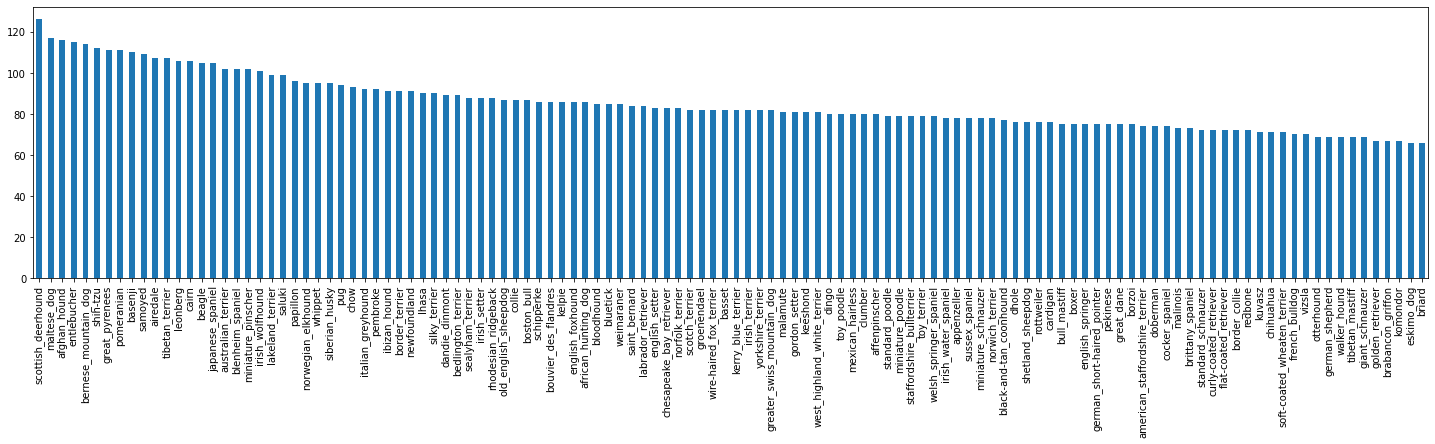

In [ ]:
labels_df['breed'].value_counts().plot.bar(figsize=(25, 5))  # распределение пород на графике

Очевидно, что название картинки (похожее на какой-то хеш) не несёт в себе дополнительной информации, и не может быть использовано как признак - это всего лишь индекс. Поэтому посмотрим на сами картинки.

In [ ]:
labels_df['id'][0]  # название картинки

'000bec180eb18c7604dcecc8fe0dba07.jpg'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
image = plt.imread('train/' + labels_df['id'][0])  # добавим путь через папку "train" и прочитаем картинку

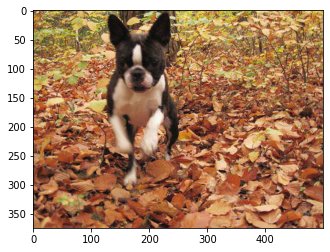

In [ ]:
plt.imshow(image)  # нарисуем картинку

Нарисуем сразу несколько картинок с подписями

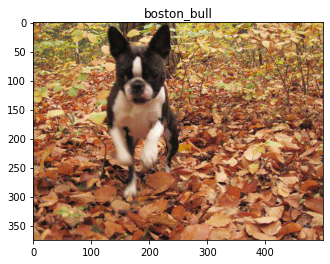

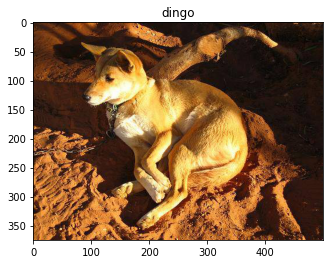

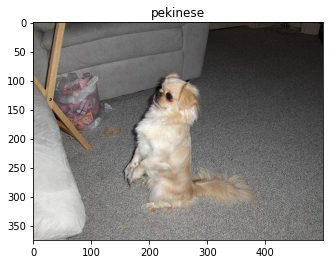

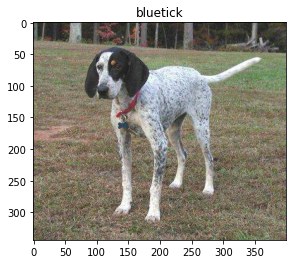

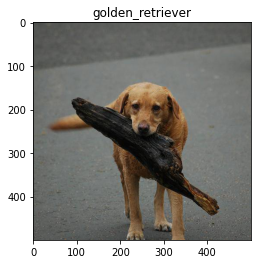

In [ ]:
for img_path, breed in zip(labels_df['id'][:5], labels_df['breed'][:5]):  # для первых пяти картинок: для каждой пары "id" и "порода"
    plt.figure()  # создаём новый объект для рисования картинки
    image = plt.imread('train/' + img_path)  # добавим путь через папку "train" и прочитаем картинку
    plt.imshow(image)  # нарисуем картинку
    plt.title(breed)  # подписываем породу

# Базовая модель без машинного обучения

Какого-то признака, по которым можно было бы угадать породу без машинного обучения, не видно. А ещё видно, что все картинки разных размеров - для использования моделей МО надо привести их к одному.

# Подготовка данных для моделей машинного обучения

Сначала надо получить данные в понятном формате. На курсе про нейронные сети от Андрея Созыкина рассказывали, что для этого нужно получить из модели отдельные пиксели, разделить их на 3 цвета (RGB) и разделить на 255, чтобы входные данные были массивом чисел от 0 до 1

Гугл советует для этого использовать функции из библиотеки Keras
https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img

In [ ]:
import keras

Попробуем:

In [ ]:
image = keras.preprocessing.image.load_img('train/' + labels_df['id'][0])  # читаем картинку из файла

In [ ]:
image_matrix = keras.preprocessing.image.img_to_array(image)  # преобразуем в числа

In [ ]:
type(image_matrix)  # тип преобразованной картинки

numpy.ndarray

In [ ]:
image_matrix.shape  # размерность

(375, 500, 3)

Сейчас надо привести все картинки к одному размеру. Гугл отсылает к https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator, который умеет много всего интересного

Создадим генератор данных, который из картинок делает массивы одной размерности

In [ ]:
data_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0 / 255,  # яркость пикселя привести в 0..1
    validation_split = 0.2)  # в качестве валидационной выборки взять 20%

Создадим тренировочную и тестовую (валидационную) выборки

In [ ]:
train_gen = data_gen.flow_from_dataframe(labels_df,  # откуда брать разметку
                                    directory='train',  # откуда брать данные - они все в папке "train"
                                    x_col='id',  # колонка, отвечающая за вектора признаков
                                    y_col='breed',  # колонка - ответы (разметка)
                                    subset='training',  # это - тренировочная выборка тренировочного датасета
                                    target_size=(200, 200),  # размер картинок привести к такому, чтобы не превысить кол-во входных нейронов
                                    batch_size=64,  # по 64 картинки в батче
                                    seed=1)  # для повторяемости

val_gen = data_gen.flow_from_dataframe(labels_df,
                                  directory='train',  # тестовые картинки тоже берём из train - просто не подаём их при обучении
                                  x_col='id',
                                  y_col='breed',
                                  subset='validation',  # а это - валидационная выборка тренировочного датасета
                                  target_size=(200, 200),
                                  batch_size=64,
                                  seed=1)

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


Снова попробуем нарисовать - посмотрим, что получилось. Посмотрим на один батч из валидационной выборки (val)

In [ ]:
images = val_gen.next()  # следующий батч валидационной выборки (шаг обучения)

In [ ]:
images[0][0]  # Первый индекс - выбор данных о пикселях [0] или One-Hot разметка лэйблов [1]. Второй индекс - номер картинки

array([[[0.10588236, 0.03921569, 0.00784314],
        [0.10588236, 0.03921569, 0.00784314],
        [0.13725491, 0.07058824, 0.03921569],
        ...,
        [0.03529412, 0.04313726, 0.03921569],
        [0.03137255, 0.03529412, 0.01176471],
        [0.03137255, 0.03529412, 0.01176471]],

       [[0.14901961, 0.07450981, 0.04705883],
        [0.15294118, 0.07843138, 0.0509804 ],
        [0.1137255 , 0.03921569, 0.01176471],
        ...,
        [0.03529412, 0.04313726, 0.03921569],
        [0.02745098, 0.03137255, 0.00784314],
        [0.02745098, 0.03137255, 0.00784314]],

       [[0.15686275, 0.08627451, 0.04705883],
        [0.13725491, 0.06666667, 0.02745098],
        [0.12941177, 0.05882353, 0.01960784],
        ...,
        [0.03529412, 0.04313726, 0.03921569],
        [0.02745098, 0.03137255, 0.01176471],
        [0.02745098, 0.03137255, 0.01176471]],

       ...,

       [[0.34509805, 0.17254902, 0.        ],
        [0.43137258, 0.2627451 , 0.08627451],
        [0.427451  , 0

In [ ]:
images[0][0].shape  # размерность данных - по 200 пикселей на сторону и 3 канала - RGB

(200, 200, 3)

In [ ]:
images[1][0]  # разметка в One-Hot (Keras сразу сделал для удобства обучения нейронки): ответы, известные из labels_df

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0.], dtype=float32)

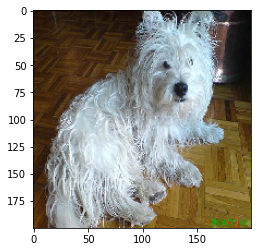

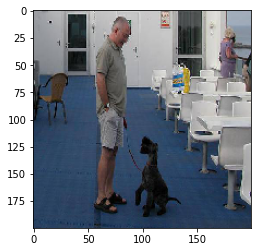

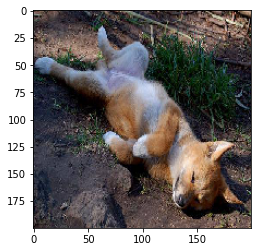

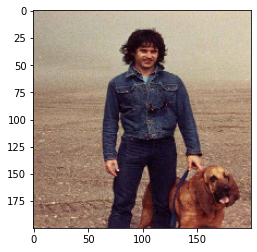

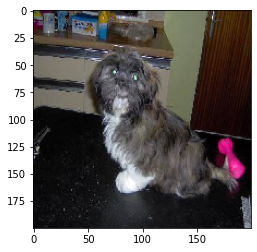

In [ ]:
for image in images[0][:5]:  # для пикселей первых 5 картинок батча
    plt.figure()  # создаём новый объект для рисования картинки
    plt.imshow(image)  # рисуем картинку

Данные готовы, теперь можно начинать обучение

# Несколько моделей машинного обучения - от простых до сложных

Надо проверить, что GPU включено - иначе будет очень долго обучаться

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Попробуем собственную простую нейронку - просто запоминать значения пикселей (пока без свёрток)

Описываем архитектуру сети

In [ ]:
model = keras.models.Sequential()  # создаём сеть с последовательными слоями
model.add(keras.layers.Flatten(input_shape=(200, 200, 3)))  # превращаем трёхмерную картинку в одномерный массив
model.add(keras.layers.Dense(  # полносвязный слой
    3000))  # количество нейронов на выходе слоя
model.add(keras.layers.Activation('relu'))  # функция активации - вносим нелинейность
model.add(keras.layers.Dense(120))  # выходной слой, количество нейронов равно количеству пород (у нас One-Hot разметка)
model.add(keras.layers.Activation('softmax'))  # сигмоида для выбора ответа

Инициализируем сеть - запишем в память веса и прочее

In [ ]:
model.compile(loss='categorical_crossentropy',  # у нас несколько классов - поэтому категориальная
              optimizer='adam',  # возьмём самый навороченный - чтобы и градиент по-умному считался, и шаг менялся интересно
              metrics=['accuracy'])  # нужна какая-то метрика, чтобы смотреть, как модель обучается

Нарисуем архитектуру сети - из Keras почему-то не вызывается, на StackOverflow написано, что надо импортировать TensorFlow (хотя Keras - это надстройка над TensorFlow -_-)

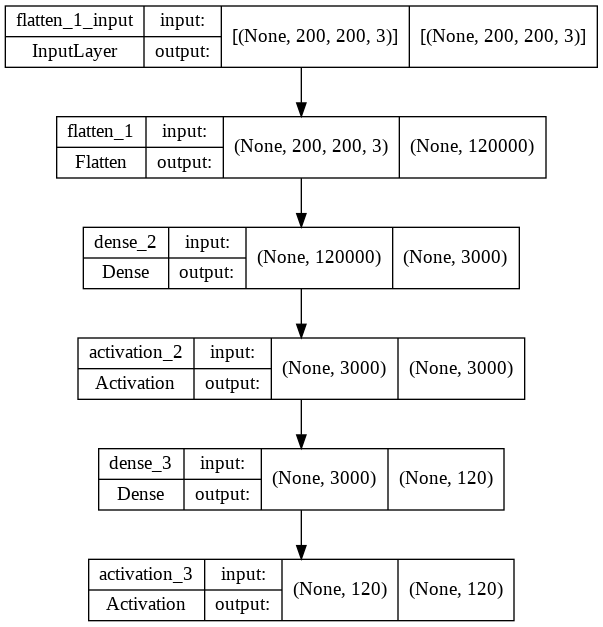

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

Обучим нашу сеть

In [ ]:
model.fit(train_gen,  # генератор тренирочоных данных
          validation_data=val_gen,  # генератор валидационных данных
          epochs=10,  # количество эпох для обучения
          steps_per_epoch=len(train_gen),
          validation_steps=len(val_gen))

Epoch 1/10
128/128 [==============================] - 47s 332ms/step - loss: 97.2460 - accuracy: 0.0087 - val_loss: 4.7899 - val_accuracy: 0.0093
Epoch 2/10
128/128 [==============================] - 39s 305ms/step - loss: 4.7912 - accuracy: 0.0121 - val_loss: 4.7871 - val_accuracy: 0.0103
Epoch 3/10
128/128 [==============================] - 38s 298ms/step - loss: 4.7865 - accuracy: 0.0117 - val_loss: 4.7875 - val_accuracy: 0.0103
Epoch 4/10
128/128 [==============================] - 38s 299ms/step - loss: 4.7849 - accuracy: 0.0116 - val_loss: 4.7861 - val_accuracy: 0.0103
Epoch 5/10
128/128 [==============================] - 38s 300ms/step - loss: 4.7837 - accuracy: 0.0116 - val_loss: 4.7857 - val_accuracy: 0.0103
Epoch 6/10
128/128 [==============================] - 42s 325ms/step - loss: 4.7827 - accuracy: 0.0116 - val_loss: 4.7853 - val_accuracy: 0.0103
Epoch 7/10
128/128 [==============================] - 39s 301ms/step - loss: 4.7819 - accuracy: 0.0116 - val_loss: 4.7850 - val_a

Результат - ничего не обучилось. В целом, оно и логично - просто по цвету отдельного пикселя сложно что-то предсказать

## Теперь попробуем сеть со свёртками - стандартное решение для обработки изображений

Архитектура модели

Статья на Хабре про свёртки: https://habr.com/ru/post/454986/

И ещё одна с гифками: https://proglib.io/p/convolution

In [ ]:
model = keras.models.Sequential()  # создаём сеть с последовательными слоями

model.add(keras.layers.Conv2D(  # операция свёртки - воздействуем фильтром на исхоное изображение
    32,  # размерность выходного пространства - количество применяемых матриц (ядер) свёртки
    (3, 3),  # kernel_size - высота и ширина окна двумерной свертки
    input_shape=(200, 200, 3)))  # размерность входных данных
model.add(keras.layers.Activation('relu'))  # функция активации - вносим нелинейность
model.add(keras.layers.MaxPooling2D(  # пулинг - выбор максимального значения в окне (как в ночной съёмке)
    pool_size=(2, 2)))  # размер окна

model.add(keras.layers.Conv2D(32, (3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten()) # превращаем трёхмерную картинку в одномерный массив
model.add(keras.layers.Dense(200))  # полносвязный слой
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))  # каждую эпоху замораживаем половину весов, чтобы не было переобучения
model.add(keras.layers.Dense(120))  # выходной слой, количество нейронов равно количеству пород (у нас One-Hot разметка)
model.add(keras.layers.Activation('softmax'))  # сигмоида для выбора ответа


In [ ]:
model.compile(loss='categorical_crossentropy',  # у нас несколько классов - поэтому категориальная
              optimizer='adam',  # возьмём самый навороченный - чтобы и градиент по-умному считался, и шаг менялся интересно
              metrics=['accuracy'])  # нужна какая-то метрика, чтобы смотреть, как модель обучается

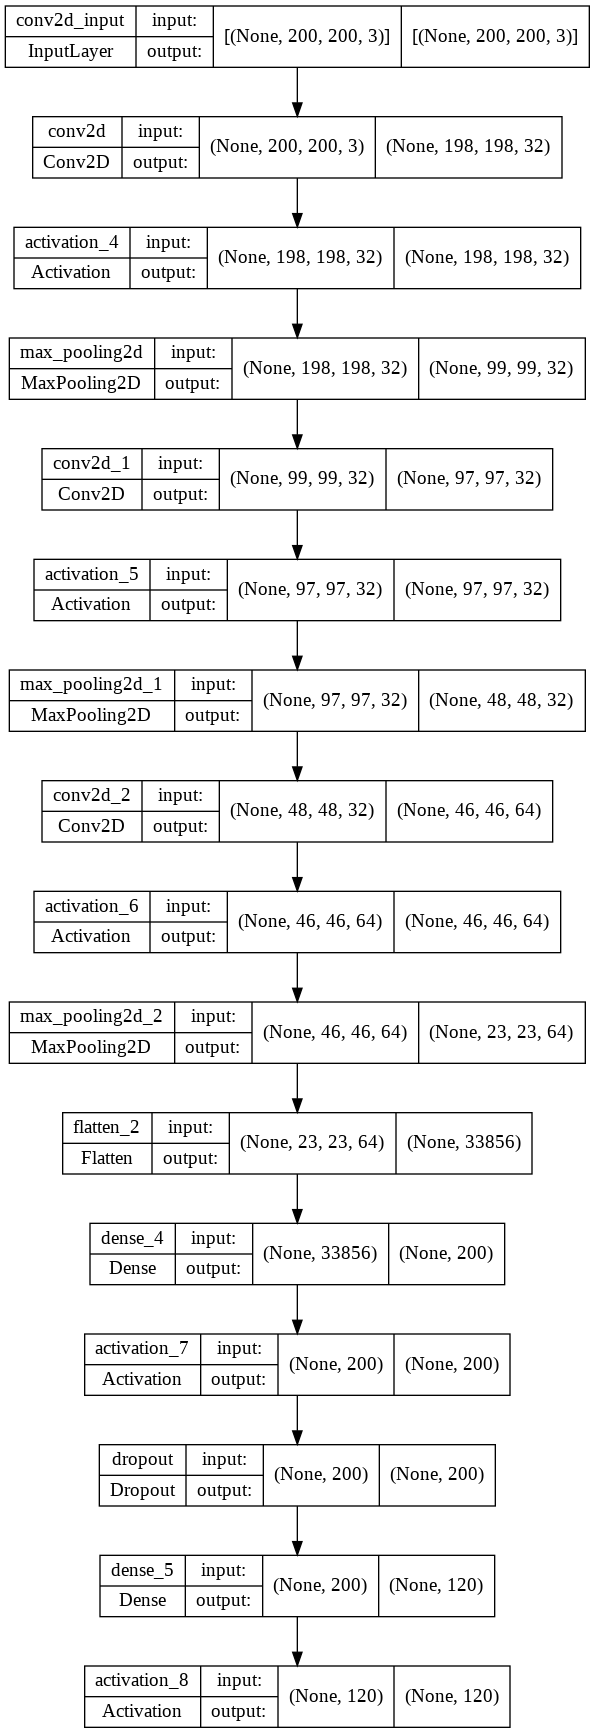

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.fit(train_gen,  # генератор тренирочоных данных
          validation_data=val_gen,  # генератор валидационных данных
          epochs=15,  # количество эпох для обучения
          steps_per_epoch=len(train_gen),
          validation_steps=len(val_gen))

Epoch 1/15
128/128 [==============================] - 39s 303ms/step - loss: 4.7966 - accuracy: 0.0101 - val_loss: 4.7845 - val_accuracy: 0.0103
Epoch 2/15
128/128 [==============================] - 38s 294ms/step - loss: 4.7517 - accuracy: 0.0154 - val_loss: 4.6917 - val_accuracy: 0.0215
Epoch 3/15
128/128 [==============================] - 37s 292ms/step - loss: 4.6247 - accuracy: 0.0264 - val_loss: 4.5589 - val_accuracy: 0.0269
Epoch 4/15
128/128 [==============================] - 37s 292ms/step - loss: 4.3956 - accuracy: 0.0517 - val_loss: 4.4521 - val_accuracy: 0.0401
Epoch 5/15
128/128 [==============================] - 37s 290ms/step - loss: 3.9958 - accuracy: 0.1077 - val_loss: 4.4143 - val_accuracy: 0.0558
Epoch 6/15
128/128 [==============================] - 38s 293ms/step - loss: 3.3695 - accuracy: 0.2108 - val_loss: 4.5517 - val_accuracy: 0.0450
Epoch 7/15
128/128 [==============================] - 37s 293ms/step - loss: 2.6200 - accuracy: 0.3522 - val_loss: 4.8633 - val_ac

Видно, что модель переобучается - точность на тренировочных данных гораздо больше, чем на тестовых. Хотя Dropout и так уже 0.5 - то есть половина весов замораживается... Можно попробовать или доработать датасет (делать перевороты-развороты картинок), или использовать большую предобученную модель

Num GPUs Available:  1
